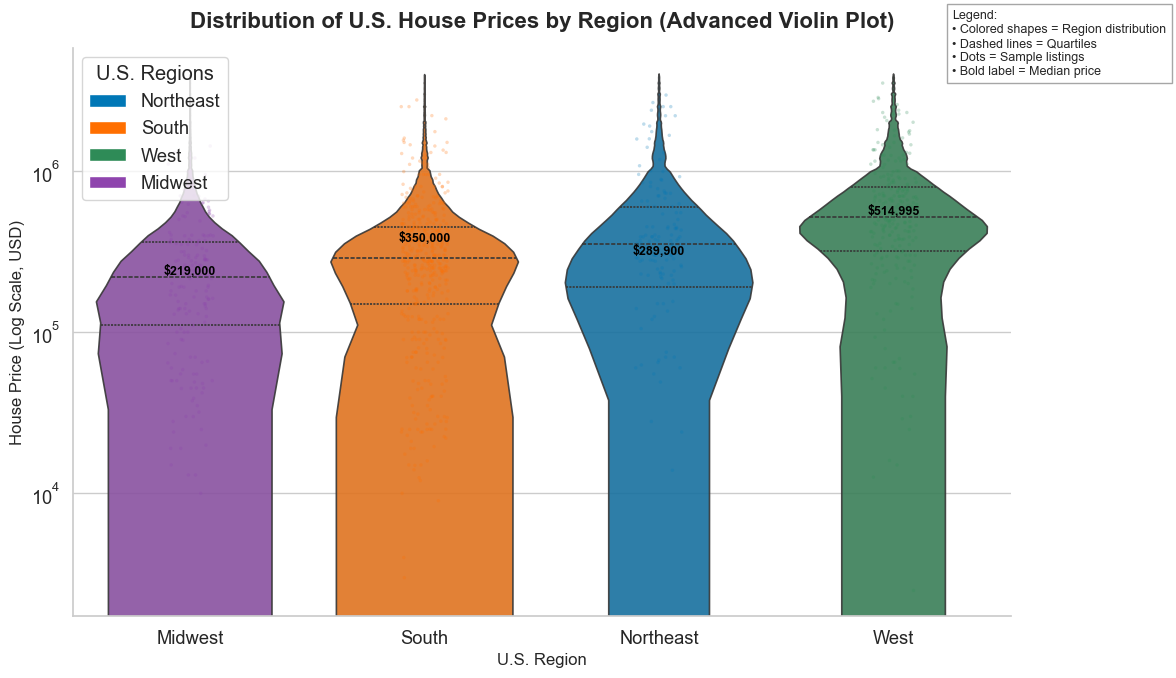

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Load dataset
file_path = r"C:\Users\Mousa\Desktop\INFSCI\realtor-data.csv"
df = pd.read_csv(file_path)

# Clean and prepare data
df = df[['state', 'price']].dropna()
df = df[df['price'] < df['price'].quantile(0.99)]  # remove extreme outliers

# Define U.S. regions
regions = {
    'Northeast': ['Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island','Vermont',
                  'New Jersey','New York','Pennsylvania'],
    'Midwest': ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas','Minnesota',
                'Missouri','Nebraska','North Dakota','South Dakota'],
    'South': ['Delaware','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia',
              'West Virginia','Alabama','Kentucky','Mississippi','Tennessee','Arkansas','Louisiana',
              'Oklahoma','Texas','District of Columbia'],
    'West': ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming','Alaska',
             'California','Hawaii','Oregon','Washington']
}

# Map states to regions
region_map = {state: region for region, states in regions.items() for state in states}
df['region'] = df['state'].map(region_map)
df = df.dropna(subset=['region'])

# Define colors for each region
region_colors = {
    'Northeast': '#0077b6',  # blue
    'South': '#ff6f00',      # orange
    'West': '#2e8b57',       # green
    'Midwest': '#8e44ad'     # purple
}

# Set plot style
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 7))

# Order regions by median price
order = df.groupby('region')['price'].median().sort_values().index

# Violin plot (fixed palette warning by adding hue=region)
sns.violinplot(
    x='region', y='price', hue='region', data=df, order=order,
    inner='quartile', linewidth=1.2, alpha=0.9,
    palette=region_colors, legend=False
)

# Overlay a stripplot for point distribution
sample_df = df.sample(min(1000, len(df)), random_state=42)
sns.stripplot(
    x='region', y='price', data=sample_df, order=order,
    hue='region', palette=region_colors,
    alpha=0.25, size=2.5, jitter=True, legend=False
)

# Annotate median values
medians = df.groupby('region')['price'].median()
for i, (region, median) in enumerate(medians.items()):
    plt.text(i, median, f"${int(median):,}", ha='center', va='bottom',
             fontweight='bold', fontsize=9, color='black')

# Apply log scale for price
plt.yscale('log')

# Titles and labels
plt.title("Distribution of U.S. House Prices by Region (Advanced Violin Plot)",
          fontsize=16, weight='bold', pad=15)
plt.xlabel("U.S. Region", fontsize=12)
plt.ylabel("House Price (Log Scale, USD)", fontsize=12)

# Custom legend for regions
legend_elements = [
    Patch(facecolor=color, label=region)
    for region, color in region_colors.items()
]
plt.legend(handles=legend_elements, title="U.S. Regions", loc="upper left")

# Add text legend explaining visual components
plt.text(3.25, 1e7, 
         "Legend:\n• Colored shapes = Region distribution\n• Dashed lines = Quartiles\n• Dots = Sample listings\n• Bold label = Median price",
         fontsize=9, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

sns.despine()
plt.tight_layout()
plt.show()